In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

In [ ]:
# Seaborn package에 내장되어 있는 mpg 데이터셋에 대해서 다음 문제를 풀어보세요.
# 1) 실린더별 mpg의 평균을 막대그래프로 그리세요.
# 2) 배기량(displacement)과 마력(horsepower)의 산점도를 그리세요.
# 3) name 컬럼으로부터 제조사를 추출하세요.
# 4) 다음 두 개의 그래프를 한 줄에 두 개가 들어가게 그리세요.
#    - 제조사별 모델의 개수(Top 10)를 막대그래프로 그리세요.
#    - 제조사별 mpg의 평균(Top 10)을 막대그래프로 그리세요.

In [11]:
# 1) 실린더별 mpg의 평균을 막대그래프로 그리세요.
mpg = sns.load_dataset('mpg')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [ ]:
mpg

In [12]:
m_pg = mpg.pivot_table('mpg','cylinders', aggfunc=['mean'])
m_pg

,mean
,mpg
cylinders,
3,20.550000
4,29.286765
5,27.366667
6,19.985714
8,14.963107


In [14]:
m_pg.columns

MultiIndex([('mean', 'mpg')],
           )

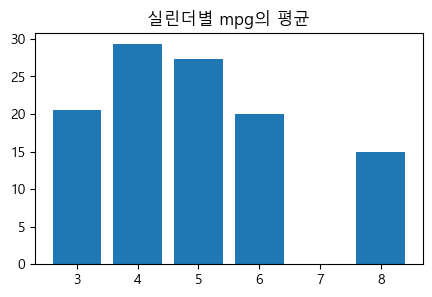

In [15]:
plt.figure(figsize=(5,3))
plt.bar(m_pg.index, m_pg[('mean', 'mpg')])
plt.title('실린더별 mpg의 평균')
plt.show()

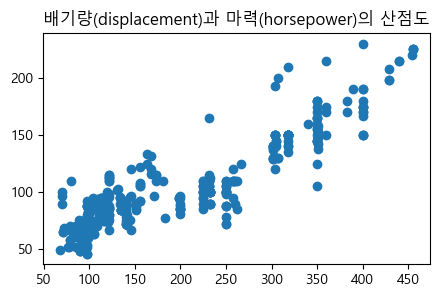

In [17]:
# 2) 배기량(displacement)과 마력(horsepower)의 산점도를 그리세요.
plt.figure(figsize=(5,3))
plt.scatter(mpg.displacement,mpg.horsepower)
plt.title('배기량(displacement)과 마력(horsepower)의 산점도')
plt.show()

In [18]:
mpg.name

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: name, Length: 398, dtype: object

In [19]:
# 3) name 컬럼으로부터 제조사를 추출하세요.
mpg['제조사'] = mpg.name.apply(lambda x: x.split()[0])
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,제조사
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


In [34]:
#    - 제조사별 모델의 개수(Top 10)를 막대그래프로 그리세요.
df = mpg['제조사'].value_counts().to_frame()
df

,count
제조사,
ford,51
chevrolet,43
plymouth,31
amc,28
dodge,28
toyota,25
datsun,23
buick,17
pontiac,16


In [45]:
df1 = df[:10]
df1

,count
제조사,
ford,51
chevrolet,43
plymouth,31
amc,28
dodge,28
toyota,25
datsun,23
buick,17
pontiac,16


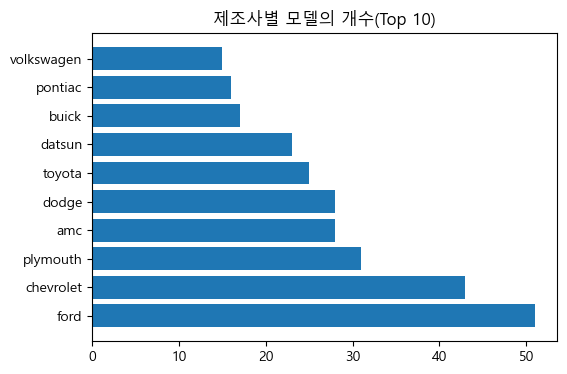

In [47]:
plt.figure(figsize=(6,4))
plt.barh(df1.index, df1['count'])
plt.title('제조사별 모델의 개수(Top 10)')
plt.show()

In [55]:
#    - 제조사별 mpg의 평균(Top 10)을 막대그래프로 그리세요.
ddf = mpg.pivot_table('mpg','제조사', aggfunc=['mean'] ).sort_values([('mean', 'mpg')], ascending=False)
ddf10 = ddf[:10]
ddf10

,mean
,mpg
제조사,
vw,39.016667
nissan,36.000000
triumph,35.000000
honda,33.761538
renault,32.880000
datsun,31.113043
mazda,30.860000
subaru,30.525000


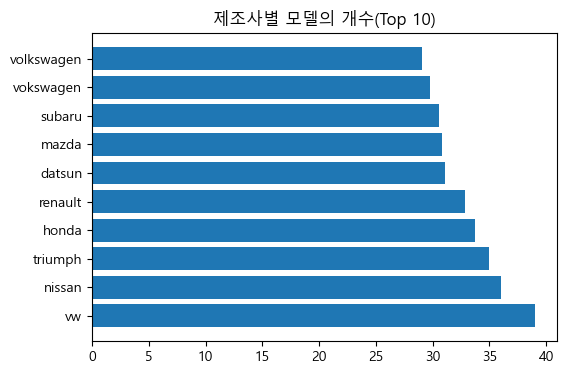

In [56]:
plt.figure(figsize=(6,4))
plt.barh(ddf10.index, ddf10[('mean', 'mpg')])
plt.title('제조사별 모델의 개수(Top 10)')
plt.show()

In [ ]:
# 경기도청사및출장소현황.csv 파일을 이용하여 다음 문제를 풀어보세요.
# 1) 도청, 시청, 구청 데이터만 추출하세요. (10)
# 2) 도로명주소를 이용하여 위도, 경도 좌표를 구하세요. (20)
# 3) 지도위에 도청, 시청, 구청을 표시하세요. (20)
#    단, 도청, 시청, 구청의 마커는 달라야 하고, 마우스를 마커위에 올리면 관공서명이
#    표시되고, 클릭하면 전화번호가 표시되도록 하세요. 

In [60]:
import pandas as pd
gmap =  pd.read_csv('../04.지도시각화/data/경기도청사및출장소현황.csv' ,encoding='euc-kr')
gmap

,집계일자,시군명,구분명,전화번호안내,소재지우편번호,소재지도로명주소,소재지지번주소,WGS84위도,WGS84경도
0,2023-03-08,안성시,안성시청,031-678-2114,17586,경기도 안성시 시청길 25,경기도 안성시 봉산동 31-3번지,37.007357,127.280313
1,2023-03-08,안성시,고삼면,031-678-3980,17505,경기도 안성시 고삼면 고삼호수로 21,경기도 안성시 고삼면 가유리 287-11번지,37.082693,127.263456
2,2023-03-08,안성시,공도읍,031-678-3610,17560,경기도 안성시 공도4로 8,경기도 안성시 공도읍 만정리 793-1번지,37.001014,127.172515
3,2023-03-08,안성시,보개면,031-678-3680,17509,경기도 안성시 보개면 보개원삼로 220,경기도 안성시 보개면 불현리 42-1번지,37.023016,127.290858
4,2023-03-08,안성시,금광면,031-678-3710,17536,경기도 안성시 금광면 금광오산로 228,경기도 안성시 금광면 내우리 20-9번지,36.997233,127.317531
...,...,...,...,...,...,...,...,...,...
815,2015-09-18,포천시,일동면,031-538-3908,487851,경기도 포천시 일동면 화동로1099번길 30 (기산리),경기도 포천시 일동면 기산리 96-137번지,37.961275,127.317287
816,2015-09-18,포천시,창수면,031-538-3906,487921,경기도 포천시 창수면 메치골로 178 (주원리),경기도 포천시 창수면 주원리 249-1번지,37.991311,127.189088
817,2015-09-18,포천시,신북면,031-538-3905,487915,경기도 포천시 신북면 호국로 2065 (기지리),경기도 포천시 신북면 기지리 893-1번지,37.933686,127.226414
818,2015-09-18,포천시,소흘읍,031-538-3901,487820,경기도 포천시 소흘읍 호국로 567 (송우리),경기도 포천시 소흘읍 송우리 495번지,37.823496,127.138433


In [95]:
# 1) 도청, 시청, 구청 데이터만 추출하세요. (10)
map1 = gmap[gmap['구분명'].str.contains("시청|구청|도청")]
map1.head()

,집계일자,시군명,구분명,전화번호안내,소재지우편번호,소재지도로명주소,소재지지번주소,WGS84위도,WGS84경도
0,2023-03-08,안성시,안성시청,031-678-2114,17586,경기도 안성시 시청길 25,경기도 안성시 봉산동 31-3번지,37.007357,127.280313
17,2023-02-15,안산시,단원구청,031-481-6000,15396,경기도 안산시 단원구 중앙대로 685 (초지동),경기도 안산시 단원구 초지동 666-2번지,37.320905,126.815245
22,2023-02-15,안산시,안산시청,031-481-2000,15335,경기도 안산시 단원구 화랑로 387 (고잔동),경기도 안산시 단원구 고잔동 515번지,37.321956,126.830878
42,2023-02-15,안산시,상록구청,031-481-5000,15585,경기도 안산시 상록구 석호로 110 (사동),경기도 안산시 상록구 사동 1585번지,37.300692,126.846368
52,2023-02-14,군포시,군포시청,031-392-3000,15829,경기도 군포시 청백리길 6,경기도 군포시 금정동 844번지,37.361254,126.936150


In [96]:
# 2) 도로명주소를 이용하여 위도, 경도 좌표를 구하세요. (20)
import requests 
from urllib.parse import quote
import pandas as pd


In [97]:
with open('../04.지도시각화/data/kakaoapikey.txt') as f:
    kakao_key = f.read()

In [98]:
base_url = 'https://dapi.kakao.com/v2/local/search/address.json' # 카카오 Request get
addr = '경기도 수원시 영통구 도청로 30 (이의동)'
url = f'{base_url}?query={quote(addr)}'
url

'https://dapi.kakao.com/v2/local/search/address.json?query=%EA%B2%BD%EA%B8%B0%EB%8F%84%20%EC%88%98%EC%9B%90%EC%8B%9C%20%EC%98%81%ED%86%B5%EA%B5%AC%20%EB%8F%84%EC%B2%AD%EB%A1%9C%2030%20%28%EC%9D%B4%EC%9D%98%EB%8F%99%29'

In [99]:
header = {'Authorization': f'KakaoAK {kakao_key}'}
result = requests.get(url, headers=header).json() 
result

{'documents': [{'address': {'address_name': '경기 수원시 영통구 이의동 0',
    'b_code': '4111710300',
    'h_code': '4111760000',
    'main_address_no': '0',
    'mountain_yn': 'N',
    'region_1depth_name': '경기',
    'region_2depth_name': '수원시 영통구',
    'region_3depth_h_name': '광교1동',
    'region_3depth_name': '이의동',
    'sub_address_no': '',
    'x': '127.053543271',
    'y': '37.2892851628003'},
   'address_name': '경기 수원시 영통구 도청로 30',
   'address_type': 'ROAD_ADDR',
   'road_address': {'address_name': '경기 수원시 영통구 도청로 30',
    'building_name': '경기도청',
    'main_building_no': '30',
    'region_1depth_name': '경기',
    'region_2depth_name': '수원시 영통구',
    'region_3depth_name': '이의동',
    'road_name': '도청로',
    'sub_building_no': '',
    'underground_yn': 'N',
    'x': '127.053543271',
    'y': '37.2892851628003',
    'zone_no': '16508'},
   'x': '127.053543271',
   'y': '37.2892851628003'}],
 'meta': {'is_end': True, 'pageable_count': 1, 'total_count': 1}}

In [100]:
result['documents'][0].keys()

dict_keys(['address', 'address_name', 'address_type', 'road_address', 'x', 'y'])

In [101]:
lat = float(result['documents'][0]['y']) # 경도 문자열로나와서 float
lng = float(result['documents'][0]['x']) # 위도
lat, lng

(37.2892851628003, 127.053543271)

In [104]:
lat_list, lng_list = [], []
for i in map1.index:
    url = f'{base_url}?query={quote(map1.소재지도로명주소[i])}' 
    result = requests.get(url, headers=header).json() 
    lat_list.append(float(result['documents'][0]['y']))
    lng_list.append(float(result['documents'][0]['x']))


In [106]:
map1['위도'] = lat_list
map1['경도'] = lng_list
map1.head()

C:\Users\YONSAI\AppData\Local\Temp\ipykernel_3240\1573646303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map1['위도'] = lat_list
C:\Users\YONSAI\AppData\Local\Temp\ipykernel_3240\1573646303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map1['경도'] = lng_list


,집계일자,시군명,구분명,전화번호안내,소재지우편번호,소재지도로명주소,소재지지번주소,WGS84위도,WGS84경도,위도,경도
0,2023-03-08,안성시,안성시청,031-678-2114,17586,경기도 안성시 시청길 25,경기도 안성시 봉산동 31-3번지,37.007357,127.280313,37.008308,127.279210
17,2023-02-15,안산시,단원구청,031-481-6000,15396,경기도 안산시 단원구 중앙대로 685 (초지동),경기도 안산시 단원구 초지동 666-2번지,37.320905,126.815245,37.319777,126.811755
22,2023-02-15,안산시,안산시청,031-481-2000,15335,경기도 안산시 단원구 화랑로 387 (고잔동),경기도 안산시 단원구 고잔동 515번지,37.321956,126.830878,37.322557,126.832714
42,2023-02-15,안산시,상록구청,031-481-5000,15585,경기도 안산시 상록구 석호로 110 (사동),경기도 안산시 상록구 사동 1585번지,37.300692,126.846368,37.301335,126.846410
52,2023-02-14,군포시,군포시청,031-392-3000,15829,경기도 군포시 청백리길 6,경기도 군포시 금정동 844번지,37.361254,126.936150,37.361023,126.935316


In [ ]:
# 3) 지도위에 도청, 시청, 구청을 표시하세요. (20)
#    단, 도청, 시청, 구청의 마커는 달라야 하고, 마우스를 마커위에 올리면 관공서명이
#    표시되고, 클릭하면 전화번호가 표시되도록 하세요. 

In [123]:
domap = map1[map1['구분명'].str.contains("도청")]

In [124]:
domap.reset_index(inplace=True)
domap

,index,집계일자,시군명,구분명,전화번호안내,소재지우편번호,소재지도로명주소,소재지지번주소,WGS84위도,WGS84경도,위도,경도
0,120,2023-02-13,수원시,경기도청,031-120,16508,경기도 수원시 영통구 도청로 30,경기도 수원시 영통구 이의동,37.294984,127.04539,37.289285,127.053543


In [125]:
del domap['index']
domap

,집계일자,시군명,구분명,전화번호안내,소재지우편번호,소재지도로명주소,소재지지번주소,WGS84위도,WGS84경도,위도,경도
0,2023-02-13,수원시,경기도청,031-120,16508,경기도 수원시 영통구 도청로 30,경기도 수원시 영통구 이의동,37.294984,127.04539,37.289285,127.053543


In [126]:
simap = map1[map1['구분명'].str.contains("시청")]

In [128]:
simap.reset_index(inplace=True)
del simap['index']

In [129]:
gumap = map1[map1['구분명'].str.contains("구청")]

In [130]:
gumap.reset_index(inplace=True)
del gumap['index']

In [107]:
import folium

In [133]:
map = folium.Map(location=[map1.위도.mean(), map1.경도.mean()], zoom_start=12)
for i in map1.index:
    folium.CircleMarker(
    radius=15,
    # color=map1.color[i],
    fill=True,
    fill_color="#3186cc",
    location=[map1.위도[i], map1.경도[i]], 
    popup=folium.Popup(map1.전화번호안내[i], max_width=200), 
    tooltip=map1.구분명[i]
).add_to(map)
title_html = '<h3 align="center" style="font-size:20px">수도청, 시청, 구청</h3>' # 지도 제목달기
map.get_root().html.add_child(folium.Element(title_html))
map

In [140]:
map = folium.Map(location=[map1.위도.mean(), map1.경도.mean()], zoom_start=12)
for i in domap.index:
    folium.CircleMarker(
    radius=15,
    # color=domap.color[i],
    fill=True,
    fill_color="#3186cc",
    location=[domap.위도[i], domap.경도[i]], 
    popup=folium.Popup(domap.전화번호안내[i], max_width=200), 
    tooltip=domap.구분명[i]
).add_to(map)
for i in simap.index:
    folium.CircleMarker(
    radius=15,
    color='red',
    fill=True,
    fill_color="#3186cc",
    location=[simap.위도[i], simap.경도[i]], 
    popup=folium.Popup(simap.전화번호안내[i], max_width=200), 
    tooltip=simap.구분명[i]
).add_to(map)
for i in gumap.index:
    folium.CircleMarker(
    radius=15,
    color='green',
    fill=True,
    fill_color="#3186cc",
    location=[gumap.위도[i], gumap.경도[i]], 
    popup=folium.Popup(gumap.전화번호안내[i], max_width=200), 
    tooltip=gumap.구분명[i]
).add_to(map)
title_html = '<h3 align="center" style="font-size:20px">수도청, 시청, 구청</h3>' # 지도 제목달기
map.get_root().html.add_child(folium.Element(title_html))
map